####  FIRST Things First I created three different data frames for three differeent data sets and then printed the heads of the datasets and also used .info() to get more information about the data.

# DATA 690 FINAL POJECT NOTEBOOK 

In [1]:
import pandas as pd
# Load data from CSV files
business_data = pd.read_csv("yelp_academic_dataset_business.csv")
review_data = pd.read_csv("yelp_academic_dataset_review.csv")
user_data = pd.read_csv("yelp_academic_dataset_user.csv")
# Explore the first few rows of each dataset
print("Business data:")
print(business_data.head())
print("\nReview data:")
print(review_data.head())
print("\nUser data:")
print(user_data.head())
# Get information about each dataset
print("Business data info:")
print(business_data.info())
print("\nReview data info:")
print(review_data.info())
print("\nUser data info:")
print(user_data.info())


Business data:
               address  attributes attributes.AcceptsInsurance  \
0    1314 44 Avenue NE         NaN                         NaN   
1                  NaN         NaN                         NaN   
2  1335 rue Beaubien E         NaN                         NaN   
3      211 W Monroe St         NaN                         NaN   
4  2005 Alyth Place SE         NaN                         NaN   

  attributes.AgesAllowed attributes.Alcohol  \
0                    NaN                NaN   
1                    NaN               none   
2                    NaN      beer_and_wine   
3                    NaN                NaN   
4                    NaN                NaN   

                                 attributes.Ambience attributes.BYOB  \
0                                                NaN             NaN   
1                                                NaN             NaN   
2  {'romantic': False, 'intimate': False, 'classy...             NaN   
3                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518169 entries, 0 to 1518168
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   average_stars       1518169 non-null  float64
 1   compliment_cool     1518169 non-null  int64  
 2   compliment_cute     1518169 non-null  int64  
 3   compliment_funny    1518169 non-null  int64  
 4   compliment_hot      1518169 non-null  int64  
 5   compliment_list     1518169 non-null  int64  
 6   compliment_more     1518169 non-null  int64  
 7   compliment_note     1518169 non-null  int64  
 8   compliment_photos   1518169 non-null  int64  
 9   compliment_plain    1518169 non-null  int64  
 10  compliment_profile  1518169 non-null  int64  
 11  compliment_writer   1518169 non-null  int64  
 12  cool                1518169 non-null  int64  
 13  elite               67109 non-null    object 
 14  fans                1518169 non-null  int64  
 15  friends        

##### Through the output it is evident that the additional cleaning is required because it contains lot of null values in it. 

In [6]:
!pip install missingno


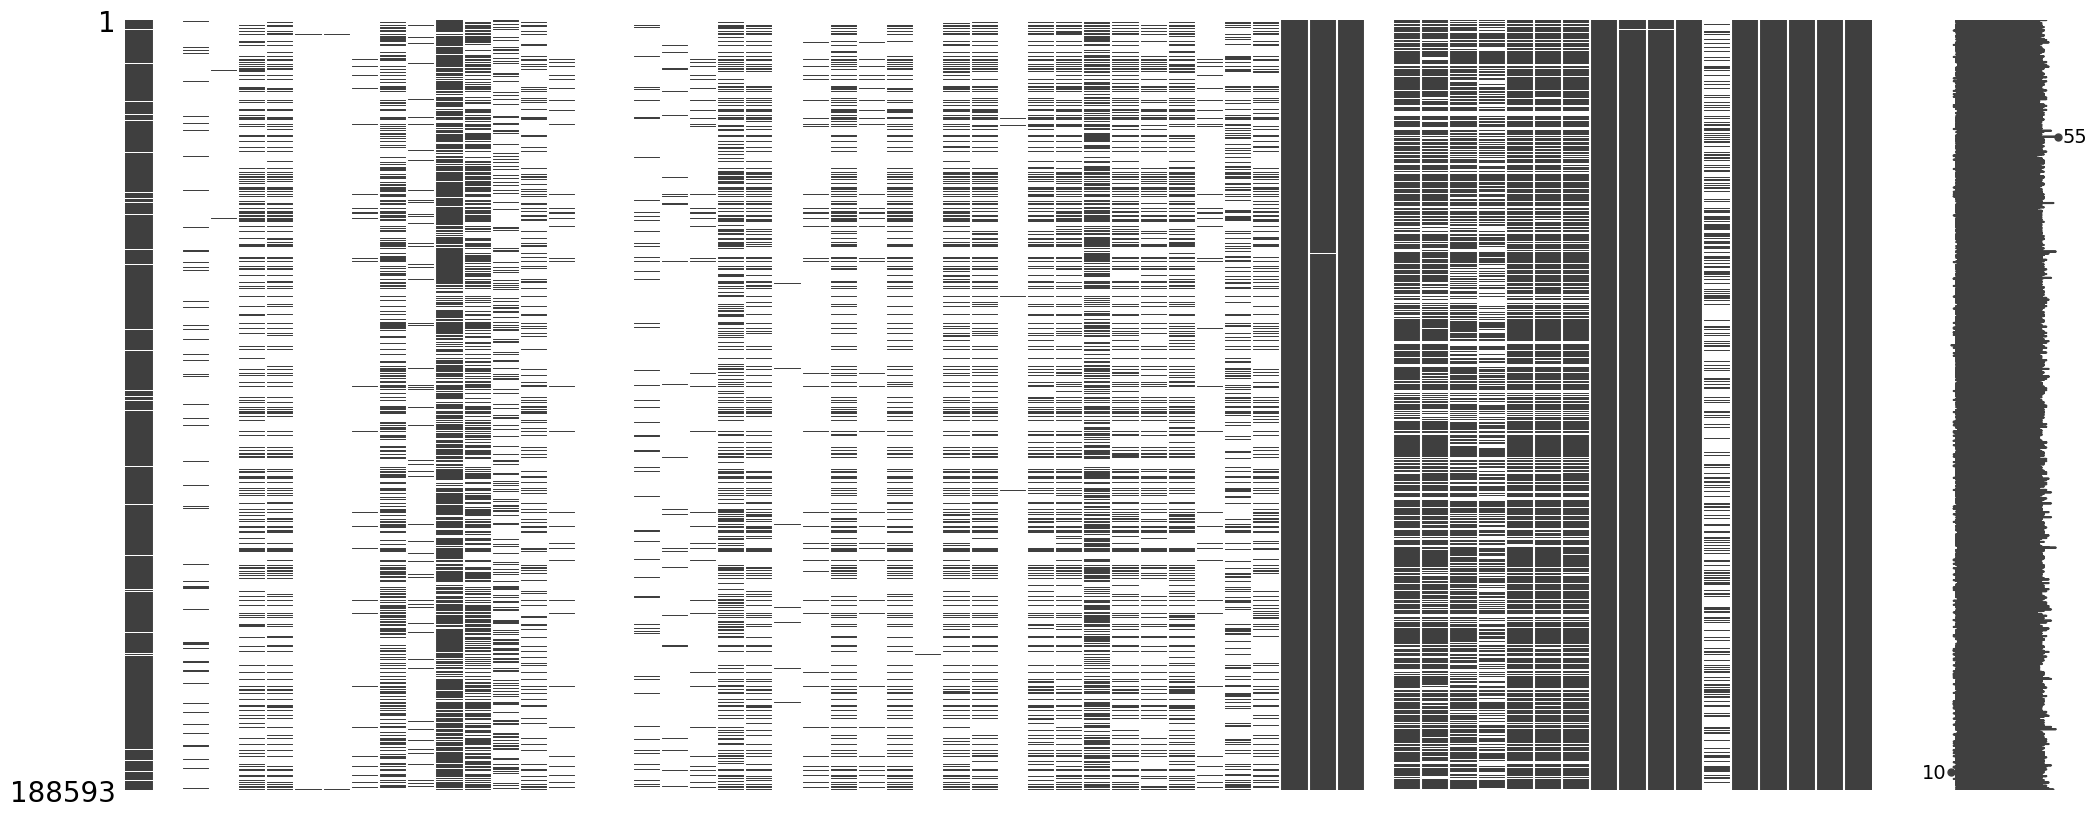

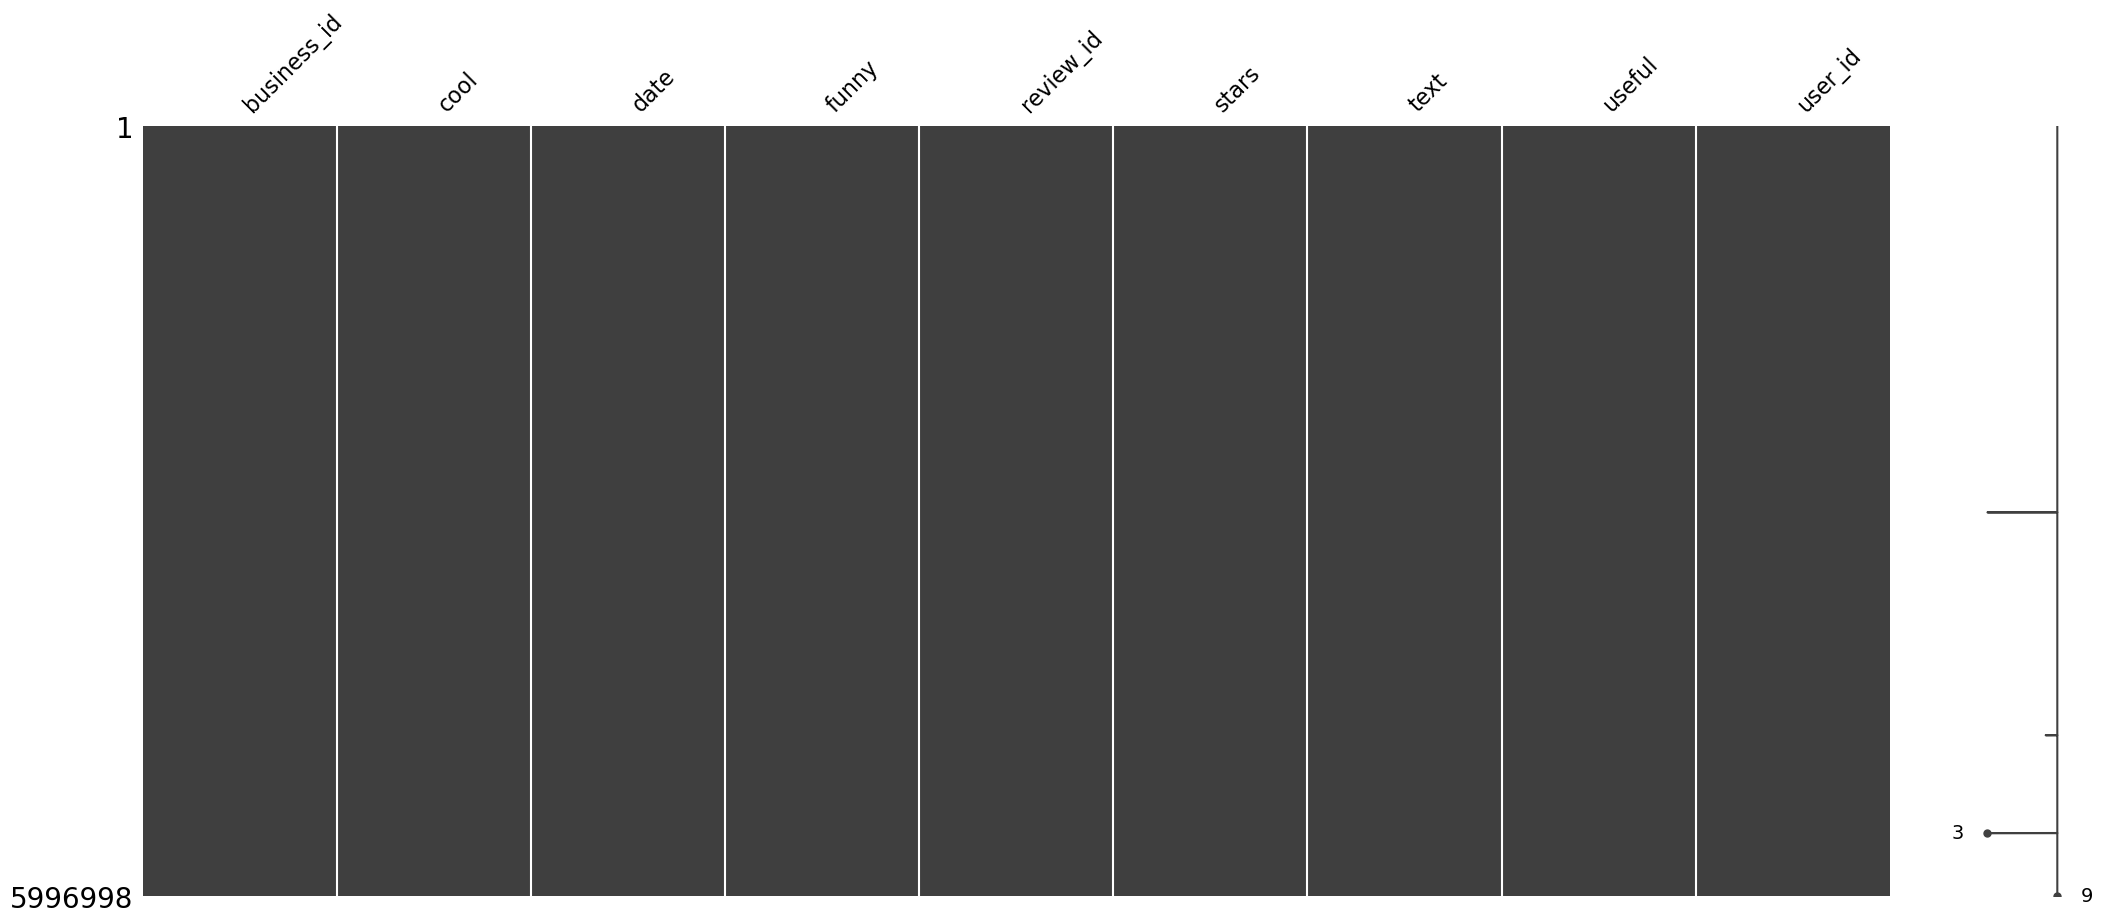

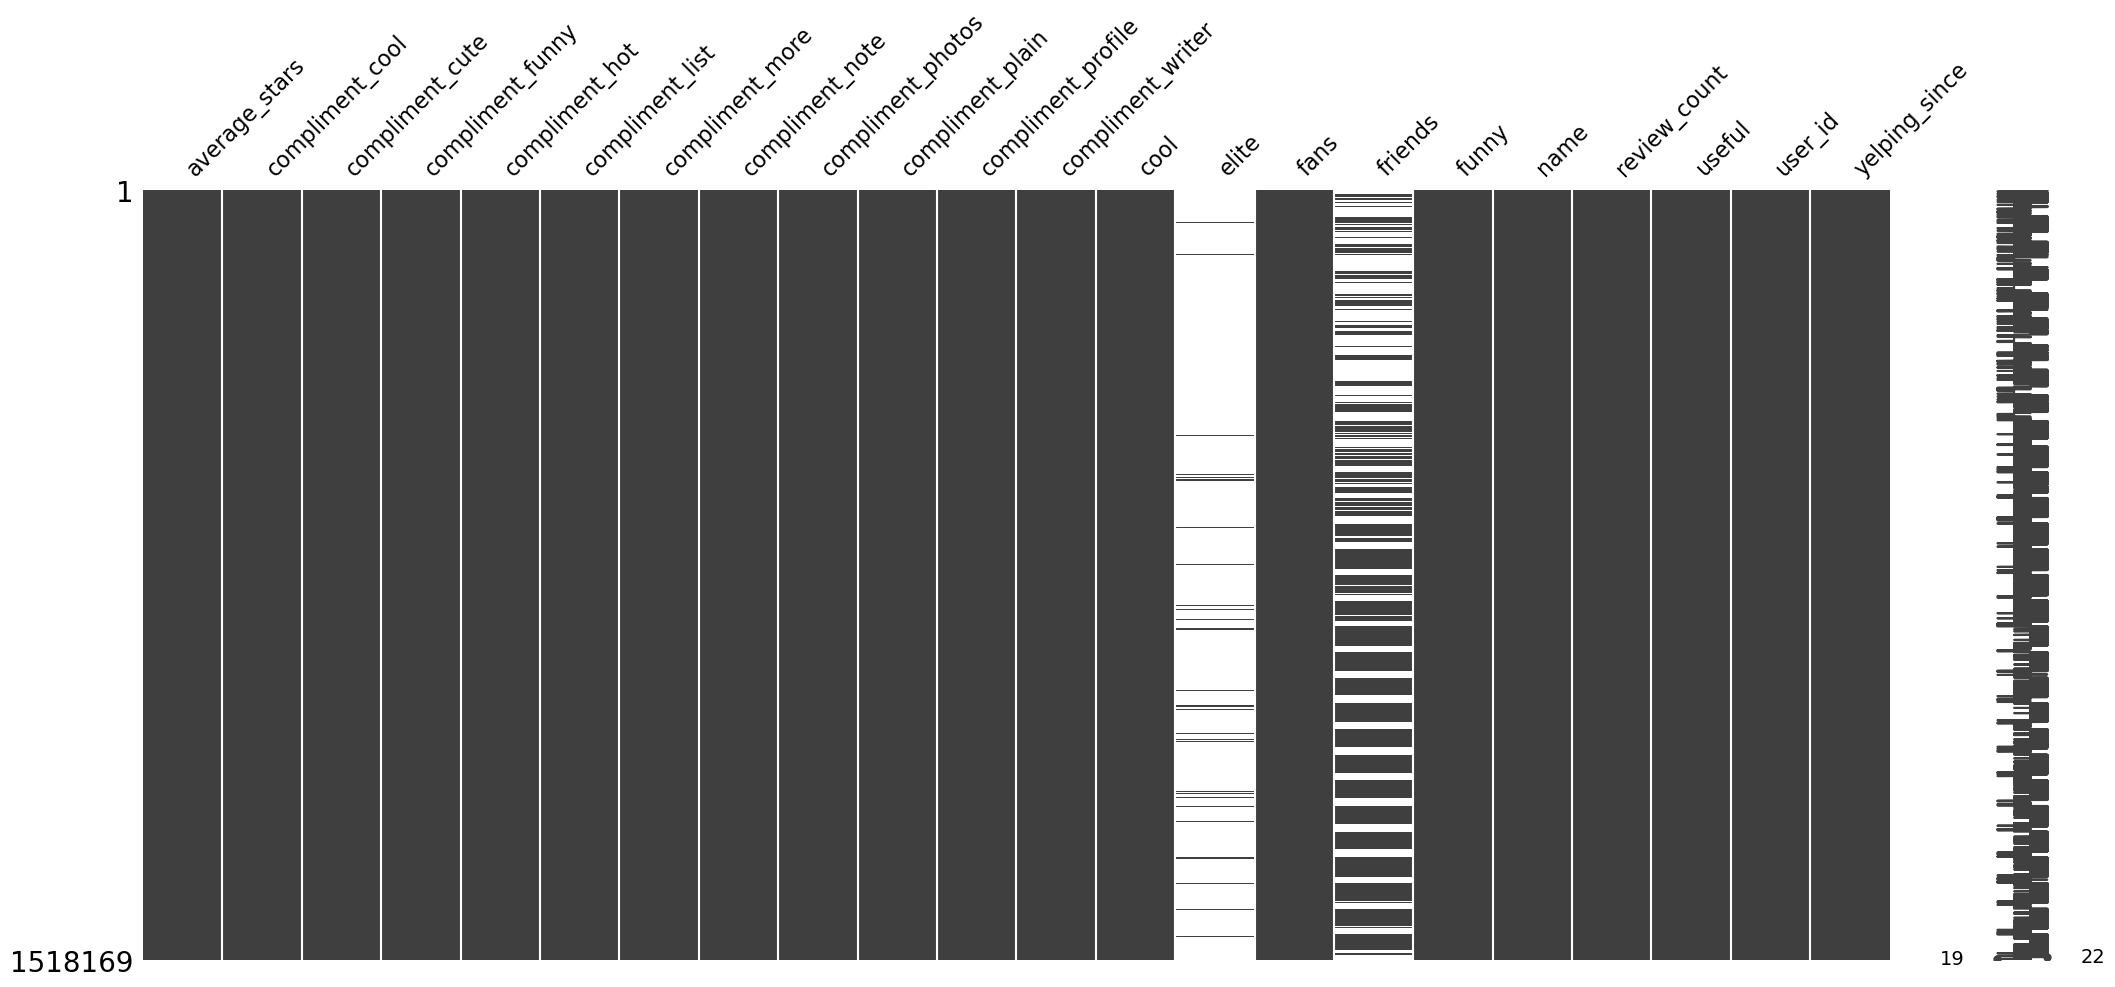

In [7]:
import missingno as msno
import matplotlib.pyplot as plt
# Visualize missing values
msno.matrix(business_data)
plt.show()
msno.matrix(review_data)
plt.show()
msno.matrix(user_data)
plt.show()


###### In these i used missingno to vilualise missing values in each data set.

In [8]:
# Check for missing values in business_dataIn these i used mi
missing_business_data = business_data.isnull().sum()
print("Missing values in business_data:")
print(missing_business_data[missing_business_data > 0])
# Check for missing values in review_data
missing_review_data = review_data.isnull().sum()
print("\nMissing values in review_data:")
print(missing_review_data[missing_review_data > 0])
# Check for missing values in user_data
missing_user_data = user_data.isnull().sum()
print("\nMissing values in user_data:")
print(missing_user_data[missing_user_data > 0])


Missing values in business_data:
address                                    7623
attributes                               188593
attributes.AcceptsInsurance              176922
attributes.AgesAllowed                   188196
attributes.Alcohol                       140701
attributes.Ambience                      141016
attributes.BYOB                          187682
attributes.BYOBCorkage                   187184
attributes.BestNights                    181749
attributes.BikeParking                   103702
attributes.BusinessAcceptsBitcoin        175919
attributes.BusinessAcceptsCreditCards     48202
attributes.BusinessParking                85169
attributes.ByAppointmentOnly             143170
attributes.Caters                        148555
attributes.CoatCheck                     180062
attributes.Corkage                       187936
attributes.DietaryRestrictions           188455
attributes.DogsAllowed                   174912
attributes.DriveThru                     181839
attribu

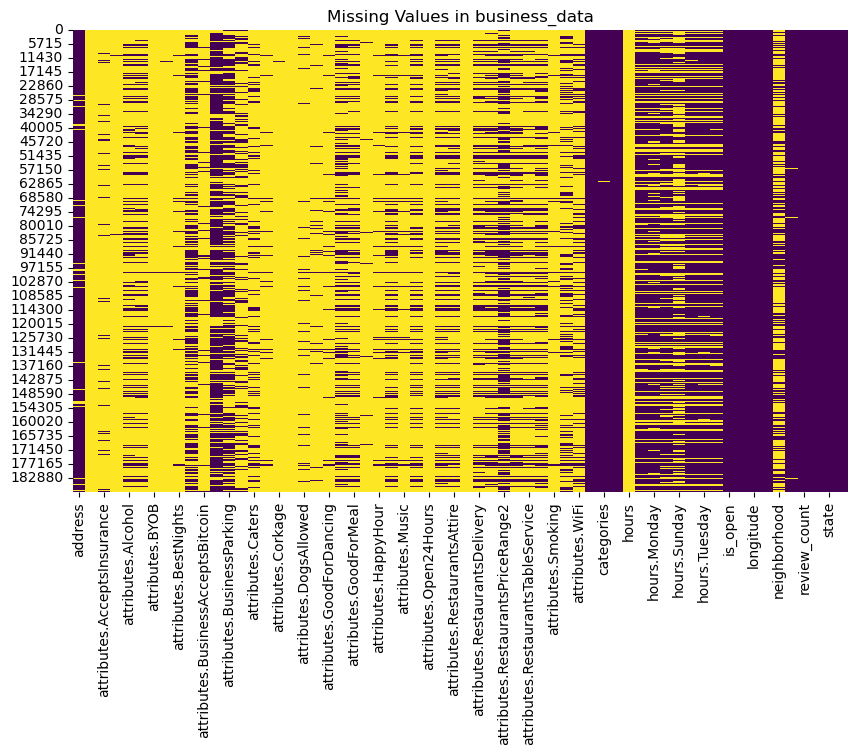

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize missing values in business_data
plt.figure(figsize=(10, 6))
sns.heatmap(business_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in business_data')
plt.show()


###### In above two cells as the part of preprocessing the data i reviwed each attribute in data and using seaborn i visuallu plotted it  

### STEP 2 :: CLEANING 

In [13]:
# Identify numerical and categorical columns
numerical_cols = business_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = business_data.select_dtypes(include=['object']).columns
print("Numerical Columns:")
print(numerical_cols)
print("\nCategorical Columns:")
print(categorical_cols)
# Fill missing values for numerical columns with the mean
business_data[numerical_cols] = business_data[numerical_cols].fillna(business_data[numerical_cols].mean())
# Fill missing values for categorical columns with the mode
business_data[categorical_cols] = business_data[categorical_cols].fillna(business_data[categorical_cols].mode().iloc[0])
# Check if there are any remaining missing values
remaining_missing = business_data.isnull().sum()
print("\nRemaining Missing Values:")
print(remaining_missing[remaining_missing > 0])


Numerical Columns:
Index(['attributes', 'attributes.RestaurantsPriceRange2', 'hours', 'is_open',
       'latitude', 'longitude', 'review_count', 'stars_x', 'stars_y'],
      dtype='object')

Categorical Columns:
Index(['address', 'attributes.AgesAllowed', 'attributes.Alcohol',
       'attributes.Ambience', 'attributes.BYOBCorkage',
       'attributes.BestNights', 'attributes.BusinessParking',
       'attributes.DietaryRestrictions', 'attributes.GoodForMeal',
       'attributes.HairSpecializesIn', 'attributes.Music',
       'attributes.NoiseLevel', 'attributes.RestaurantsAttire',
       'attributes.Smoking', 'attributes.WiFi', 'business_id', 'categories',
       'city', 'hours.Friday', 'hours.Monday', 'hours.Saturday',
       'hours.Sunday', 'hours.Thursday', 'hours.Tuesday', 'hours.Wednesday',
       'name', 'neighborhood', 'postal_code', 'state'],
      dtype='object')

Remaining Missing Values:
attributes    188593
hours         188593
dtype: int64


##### AS data data contain lot of missing values i did following steps:
*filled missing values for numerical columns with mean. 
*filled missing values for categorical columns with mode.
*and checked are there any missing values.


In [14]:
# Drop columns with a high number of missing values
business_data = business_data.drop(['attributes', 'hours'], axis=1)


here i dropped the high number of missing values column as it is also not required for future analysis.

In [17]:

print(business_data.head())


                  address  attributes.AcceptsInsurance attributes.AgesAllowed  \
0       1314 44 Avenue NE                         True                 21plus   
1  5757 Wayne Newton Blvd                         True                 21plus   
2     1335 rue Beaubien E                         True                 21plus   
3         211 W Monroe St                         True                 21plus   
4     2005 Alyth Place SE                         True                 21plus   

  attributes.Alcohol                                attributes.Ambience  \
0               none  {'romantic': False, 'intimate': False, 'classy...   
1               none  {'romantic': False, 'intimate': False, 'classy...   
2      beer_and_wine  {'romantic': False, 'intimate': False, 'classy...   
3               none  {'romantic': False, 'intimate': False, 'classy...   
4               none  {'romantic': False, 'intimate': False, 'classy...   

   attributes.BYOB attributes.BYOBCorkage  \
0            Fals

In [16]:
business_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   address                                188593 non-null  object 
 1   attributes.AcceptsInsurance            188593 non-null  bool   
 2   attributes.AgesAllowed                 188593 non-null  object 
 3   attributes.Alcohol                     188593 non-null  object 
 4   attributes.Ambience                    188593 non-null  object 
 5   attributes.BYOB                        188593 non-null  bool   
 6   attributes.BYOBCorkage                 188593 non-null  object 
 7   attributes.BestNights                  188593 non-null  object 
 8   attributes.BikeParking                 188593 non-null  bool   
 9   attributes.BusinessAcceptsBitcoin      188593 non-null  bool   
 10  attributes.BusinessAcceptsCreditCards  188593 non-null  

##### remove duplicates in each dataframe 

In [18]:
# Remove duplicates in each DataFrame
business_data = business_data.drop_duplicates()
review_data = review_data.drop_duplicates()
user_data = user_data.drop_duplicates()


ALL SET NOW THE DATASETS ARE PREPROSSED AND READY FOR FUTURE ANALYSIS: 

## Q1 Do businesses with more reviews tend to have higher ratings?

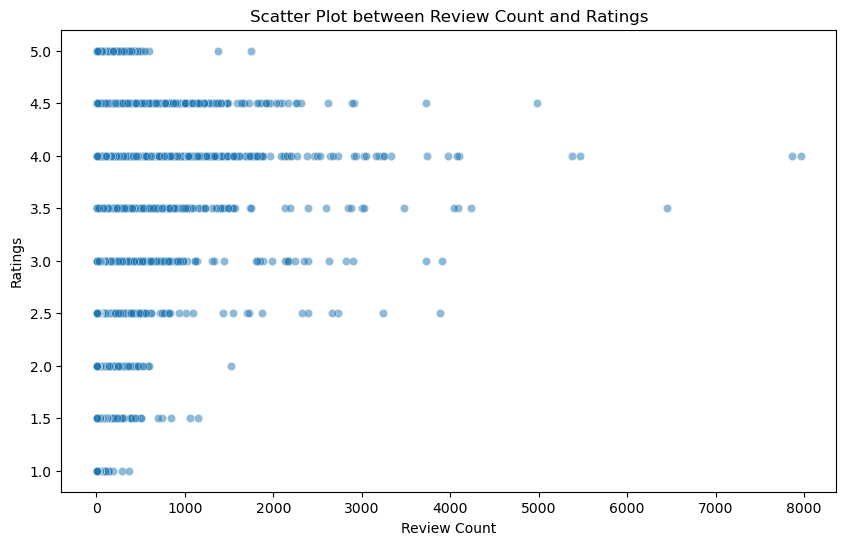

Correlation Coefficient: 0.032413313301725755


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_count', y='stars_x', data=business_data, alpha=0.5)
plt.title('Scatter Plot between Review Count and Ratings')
plt.xlabel('Review Count')
plt.ylabel('Ratings')
plt.show()
# Calculate correlation coefficient
correlation_coefficient = business_data['review_count'].corr(business_data['stars_x'])
print(f'Correlation Coefficient: {correlation_coefficient}')


 #### Through these visualiztion we could say that reviews and ratings are not corelated to each other as the correlation coefficient is positive it says that there is no relationship between review and ratings.
 #### There is a dense formation of clusters which says the poor relationship between review and ratings.


## Q2 Is there a difference in the rating distribution (stars) of food establishmentsby state? 

In [102]:
import plotly.express as px
food_establishments = business_data[business_data['categories'].str.contains('food', case=False, na=False)]
# Create an interactive box plot
fig = px.box(food_establishments, x='state', y='stars_x', title='Rating Distribution of Food Establishments by State',
             labels={'stars_x': 'Rating (Stars)', 'state': 'State'}, color='state')
# Customize the layout
fig.update_layout(xaxis=dict(title='State'), yaxis=dict(title='Rating (Stars)'), showlegend=False)
# Show the interactive plot
fig.show()




#### The viz outcome says there is no difference in the rating distribution of food establishments by states each states includes high and lower ratings then above box plot also says the same so we can conclude that there is no difference in rating for each state.

## Q3 Investigate differences in food establishments with/without a Happy Hourusing an appropriate visualization. 

In [101]:

business_data['has_happy_hour'] = business_data['attributes.HappyHour'].astype(str).str.lower()
# Filter data for establishments with and without Happy Hour
with_happy_hour = business_data[business_data['has_happy_hour'] == 'true']
without_happy_hour = business_data[business_data['has_happy_hour'] == 'false']
# Create an interactive bar plot using Plotly Express
fig = px.bar(x=['With Happy Hour', 'Without Happy Hour'],
             y=[with_happy_hour['review_count'].sum(), without_happy_hour['review_count'].sum()],
             labels={'x': 'Happy Hour', 'y': 'Total Review Count'},
             title='Total Review Counts for Establishments with/without Happy Hour',
             text=[with_happy_hour['review_count'].sum(), without_happy_hour['review_count'].sum()],
             height=500)
# Show the plot
fig.show()


#### There is a difference in total review counts for establishments with/without happy hour there is a huge difference the bar plot says that the the food establishments with happyhour has the more reviews compared to food establishments without happyhour.

## Q4 Suppose you work at Yelp. You have been tasked with a new initiative tocreate a new award for the highest performing food establishmentsrepresented on the Yelp platform. The team at Yelp has determined that anyfood establishment that has both the highest stars rating AND the largesttotal number of reviews (review_count) in their city deserves the Best LocalFood Establishment Award. You have been tasked with writing Python codethat can determine which food establishments in a dataset deserve this newprestigious award.

In [100]:
# Filter rows with food establishments
food_establishments = business_data[business_data['categories'].str.contains('food', case=False, na=False)]
# Group by city and find the establishment with the highest stars rating and the largest total number of reviews
best_food_establishments = (
    food_establishments
    .groupby('city')
    .apply(lambda group: group.nlargest(1, 'review_count').nlargest(1, 'stars_x'))
    .reset_index(drop=True)
)
# Display the establishments deserving the Best Local Food Establishment Award
print(best_food_establishments[['name', 'city', 'stars_x', 'review_count']])


                                name                        city  stars_x  \
0                         McDonald's                   AGINCOURT      2.0   
1                         McDonald's                   Agincourt      3.0   
2                     Cupz N' Crepes                   Ahwatukee      4.0   
3                   Abe's Restaurant                     Airdrie      4.0   
4    The Keg Steakhouse + Bar - Ajax                        Ajax      4.5   
..                               ...                         ...      ...   
597                     Yummy Market  York Regional Municipality      3.5   
598             Mighty Moo Ice Cream                   Youngtown      5.0   
599            Best Grocery Delivery                     clinton      5.0   
600              Gibbs Butcher Block            columbia station      4.0   
601                      Liquor Fort                   las vegas      3.5   

     review_count  
0               7  
1               4  
2             2

In this i first filtered the rows with food establishments and then group by city and find the food establishments with reviews abd ratings and then displays the establishmnets deserving the best local food establishment award 

In [99]:

food_establishments = business_data[business_data['categories'].str.contains('Restaurants')]
# Grouping by city and get the maximum stars for each city
max_stars_per_city = food_establishments.groupby('city')['stars_x'].max().reset_index()
food_establishments_with_max_stars = pd.merge(food_establishments, max_stars_per_city, how='inner', on=['city', 'stars_x'])

# Get the top food establishments with the highest review count in each city
top_food_establishments = food_establishments_with_max_stars.sort_values(by=['city', 'review_count'], ascending=[True, False])
top_food_establishments = top_food_establishments.drop_duplicates(subset='city')

# Select the top 10 food establishments based on review count
top_10_food_establishments = top_food_establishments.nlargest(10, 'review_count')

# Plotting using Plotly Express
fig = px.bar(top_10_food_establishments, x='review_count', y='city', color='stars_x',
             labels={'review_count': 'Review Count', 'city': 'City'},
             title='Top 10 Local Food Establishments for Yelp Award',
             color_continuous_scale='Viridis')

# Customize the layout
fig.update_layout(xaxis=dict(title='Review Count'), yaxis=dict(title='City'),
                  legend=dict(title='Stars Rating'), height=500, width=800)

# Show the interactive plot
fig.show()



In this i just plotted the top ten local food establishments which eligble for yelp award.

## Q5B Do reviews with exclamation points seem to be either very highlyrated or very low rated? Determine the stars distribution as a functionof the number of exclamation points used in the review. Draw asuitable plot.

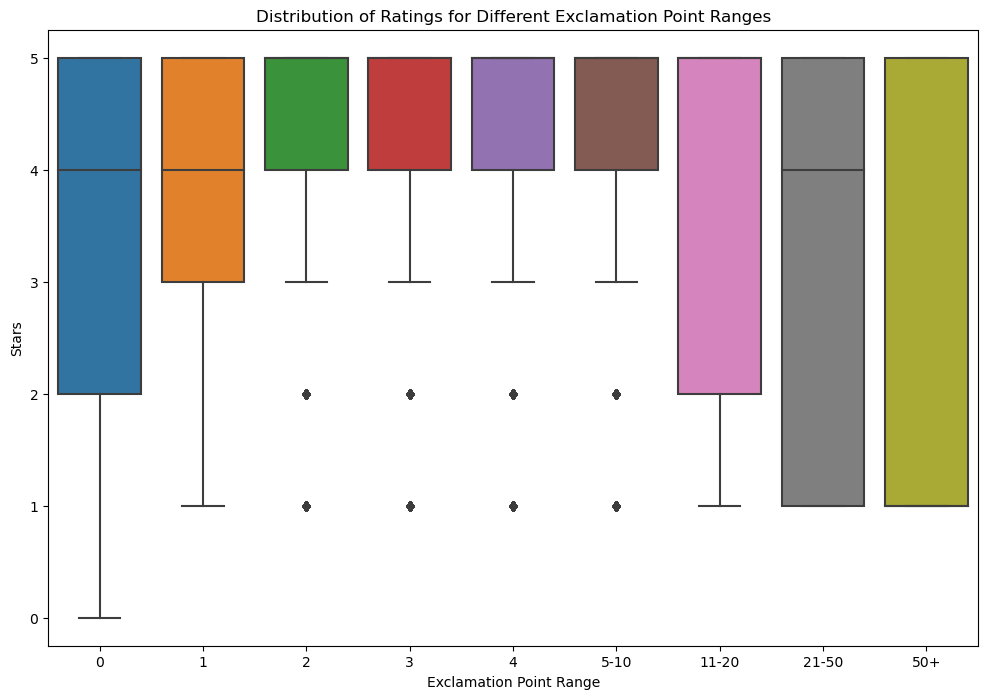

In [98]:
# Check for NaN or float values in the 'text' column and replace them with an empty string
review_data['text'] = review_data['text'].fillna('')

# Count exclamation points in each review
review_data['exclamation_count'] = review_data['text'].apply(lambda x: str(x).count('!'))

# Define ranges for exclamation points
bins = [0, 1, 2, 3, 4, 5, 10, 20, 50, float('inf')]
labels = ['0', '1', '2', '3', '4', '5-10', '11-20', '21-50', '50+']

# Create a new column for exclamation point ranges
review_data['exclamation_range'] = pd.cut(review_data['exclamation_count'], bins=bins, labels=labels, right=False)

# Visualize the distribution of ratings for different ranges of exclamation points using a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='exclamation_range', y='stars', data=review_data, order=labels)
plt.title('Distribution of Ratings for Different Exclamation Point Ranges')
plt.xlabel('Exclamation Point Range')
plt.ylabel('Stars')
plt.show()


 #### Based on the observed trends, yes, there seems to be a tendency for reviews with exclamation points to be either very highly rated or very low rated. The use of exclamation points appears to be associated with expressing strong emotions, which can manifest as either positive or negative reviews depending on the context.

